In [15]:
import torch
import cv2
from matplotlib import pyplot as plt

from loss.loss_discriminator import *
from loss.loss_generator import *
from network.blocks import *
from network.model import *
from webcam_demo.webcam_extraction_conversion import *

from params.params import path_to_chkpt
from tqdm import tqdm

#from dataset.video_extraction_conversion import *

In [16]:

"""Init"""

#Paths
path_to_model_weights = 'model_weights.tar'

path_to_embedding = 'e_hat_images.tar'
path_to_embedding = 'e_hat_images_new.tar'
path_to_model_weights = 'finetuned_model.tar'
path_to_mp4 = 'test_vid2.webm'
path_to_mp4 = 'examples/fine_tuning/test_video.mp4'

device = torch.device("cuda:0")
cpu = torch.device("cpu")

checkpoint = torch.load(path_to_model_weights, map_location=cpu) 
e_hat = torch.load(path_to_embedding, map_location=cpu)
e_hat = e_hat['e_hat'].to(device)

G = Generator(256, finetuning=True, e_finetuning=e_hat)
#G = Generator(256, finetuning=False)


"""Training Init"""
G.load_state_dict(checkpoint['G_state_dict'])
G.to(device)
G.eval()



Generator(
  (sigmoid): Sigmoid()
  (pad): Padding(
    (zero_pad): ZeroPad2d(padding=(0, 0, 0, 0), value=0.0)
  )
  (resDown1): ResBlockDown(
    (relu): ReLU()
    (relu_inplace): ReLU(inplace=True)
    (avg_pool2d): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (conv_l1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv_r1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (conv_r2): Conv2d(64, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
  )
  (in1): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
  (resDown2): ResBlockDown(
    (relu): ReLU()
    (relu_inplace): ReLU(inplace=True)
    (avg_pool2d): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (conv_l1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
    (conv_r1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv_r2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (in2): InstanceNorm2d(128,

(256, 256, 3)


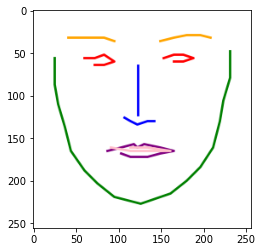

In [17]:
img = cv2.imread('examples/fine_tuning/test_images/test_cranston.jpeg')
res = generate_cropped_landmarks([img], pad=50)
g_y = res[0][1]
print(g_y.shape)
#g_y = torch.from_numpy(g_y).transpose(2,4)
#frame_mark_images = torch.from_numpy(np.array(frame_mark_images)).type(dtype = torch.float) #1,2,256,256,3
#frame_mark_images = frame_mark_images.transpose(2,4).to(self.device) #1,2,3,256,256
plt.imshow(g_y)

In [18]:
generate_landmarks

<function webcam_demo.webcam_extraction_conversion.generate_landmarks(cap, device, pad)>

In [19]:
t2 = generate_landmarks([img], pad=50)

TypeError: generate_landmarks() missing 1 required positional argument: 'device'

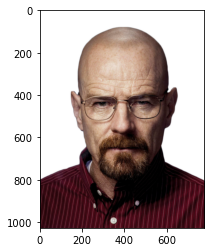

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
g_yy = torch.transpose(torch.from_numpy(g_y),0,2).view(1,3,256,256).type(torch.float).to(device)

/home/zhaoy/anaconda3/envs/fewshot/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  """Entry point for launching an IPython kernel.


In [27]:
g_yy.shape

torch.Size([1, 3, 256, 256])

In [28]:
g_yy.dtype

torch.float32

In [7]:
x_hat = G(g_yy, e_hat)

In [8]:
x_hat.shape

torch.Size([1, 3, 256, 256])

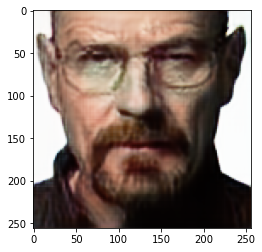

In [9]:
xxx = x_hat.detach().cpu().squeeze()
xxx = torch.transpose(xxx,0,2)
xxx.shape
plt.imshow(xxx/255)

In [10]:

cap = cv2.VideoCapture(path_to_mp4)
print(cap)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
ret = True
i = 0
size = (256*3,256)
#out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc('M','P','4','2'), 30, size)
video = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)


<VideoCapture 0x7f52280add70>


In [20]:

with torch.no_grad():
    for qq in range(1):
        x, g_y, ret = generate_landmarks(cap=cap, device=device, pad=50)
        g_y = g_y.unsqueeze(0)/255
        x = x.unsqueeze(0)/255


        #forward
        # Calculate average encoding vector for video
        #f_lm_compact = f_lm.view(-1, f_lm.shape[-4], f_lm.shape[-3], f_lm.shape[-2], f_lm.shape[-1]) #BxK,2,3,224,224
        #train G

        x_hat = G(g_y, e_hat)

        plt.clf()
        out1 = x_hat.transpose(1,3)[0]
        #for img_no in range(1,x_hat.shape[0]):
        #    out1 = torch.cat((out1, x_hat.transpose(1,3)[img_no]), dim = 1)
        out1 = out1.to(cpu).numpy()
        #plt.imshow(out1)
        #plt.show()

        #plt.clf()
        out2 = x.transpose(1,3)[0]
        #for img_no in range(1,x.shape[0]):
        #    out2 = torch.cat((out2, x.transpose(1,3)[img_no]), dim = 1)
        out2 = out2.to(cpu).numpy()
        #plt.imshow(out2)
        #plt.show()

        #plt.clf()
        out3 = g_y.transpose(1,3)[0]
        #for img_no in range(1,g_y.shape[0]):
        #    out3 = torch.cat((out3, g_y.transpose(1,3)[img_no]), dim = 1)
        out3 = out3.to(cpu).numpy()
        #plt.imshow(out3)
        #plt.show()

        fake = cv2.cvtColor(out1*255, cv2.COLOR_BGR2RGB)
        me = cv2.cvtColor(out2*255, cv2.COLOR_BGR2RGB)
        landmark = cv2.cvtColor(out3*255, cv2.COLOR_BGR2RGB)
        img = np.concatenate((me, landmark, fake), axis=1)
        img = img.astype('uint8')
        #video.write(img)

        i+=1
        print(i,'/',n_frames)
#cap.release()
#video.release()
"""cv2.destroyAllWindows()"""

True
1 / 100


'cv2.destroyAllWindows()'

<Figure size 432x288 with 0 Axes>

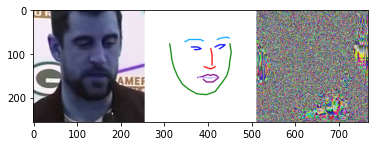

In [21]:
plt.imshow(img)

In [26]:
g_y.shape

torch.Size([1, 3, 256, 256])

In [30]:
g_y.dtype

torch.float32

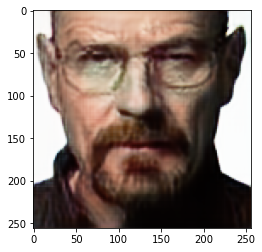

In [33]:
x2 = G(g_yy,x_hat)
x2 = x2.detach().cpu().squeeze()
x2 = torch.transpose(x2,0,2)
plt.imshow(x2/255)

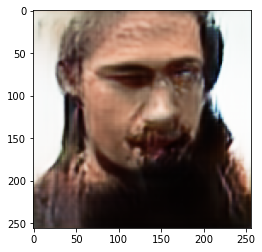

In [36]:
x = G(g_y,x_hat)
x = x.detach().cpu().squeeze()
x = torch.transpose(x,0,2)
plt.imshow(x/255)

In [1]:
!nvidia-smi

Thu Oct 29 11:35:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 455.23.05    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 207...  On   | 00000000:26:00.0  On |                  N/A |
| 32%   30C    P8    12W / 215W |    493MiB /  7974MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import zipfile

In [3]:
import os
zipdir = '/media/zhaoy/New Volume/Zhao Yue/dataset/voxceleb2'
os.listdir(zipdir)

['vox2_aac.zip', 'vox2_mp4.zip']

In [7]:
archive = zipfile.ZipFile(zipdir+'/vox2_mp4.zip')


AttributeError: 'ZipFile' object has no attribute 'nameList'

In [10]:
with zipfile.ZipFile(zipdir+'/vox2_mp4.zip','r') as zipObj:
    listFiles = zipObj.namelist()

In [11]:
listFiles

['dev/mp4/',
 'dev/mp4/id05668/',
 'dev/mp4/id05668/pqc_ipxncU4/',
 'dev/mp4/id05668/pqc_ipxncU4/00098.mp4',
 'dev/mp4/id05668/pqc_ipxncU4/00096.mp4',
 'dev/mp4/id05668/pqc_ipxncU4/00099.mp4',
 'dev/mp4/id05668/pqc_ipxncU4/00097.mp4',
 'dev/mp4/id05668/pqc_ipxncU4/00095.mp4',
 'dev/mp4/id05668/l-swZvT1UDc/',
 'dev/mp4/id05668/l-swZvT1UDc/00074.mp4',
 'dev/mp4/id05668/l-swZvT1UDc/00075.mp4',
 'dev/mp4/id05668/XWKC1JUM_ow/',
 'dev/mp4/id05668/XWKC1JUM_ow/00053.mp4',
 'dev/mp4/id05668/XWKC1JUM_ow/00054.mp4',
 'dev/mp4/id05668/XWKC1JUM_ow/00052.mp4',
 'dev/mp4/id05668/XiON982PJwg/',
 'dev/mp4/id05668/XiON982PJwg/00055.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/',
 'dev/mp4/id05668/WOOvQ7euzB0/00039.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00043.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00041.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00046.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00045.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00042.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00044.mp4',
 'dev/mp4/id05668/WOOvQ7euzB0/00040.mp4',
 'd

In [18]:
vid = archive.read('dev/mp4/id05668/d_qVAG39Ewo/00067.mp4')


In [19]:
import cv2
cv2.VideoCapture(vid)

TypeError: Argument 'index' is required to be an integer

In [22]:
with zipfile.ZipFile(zipdir+'/vox2_mp4.zip','r') as zipObj:
    zipObj.extract(listFiles[1234])

In [33]:
import torch
import cv2
from matplotlib import pyplot as plt

from loss.loss_discriminator import *
from loss.loss_generator import *
from network.blocks import *
from network.model import *
from webcam_demo.webcam_extraction_conversion import *

from params.params import path_to_chkpt
from tqdm import tqdm

"""Init"""

#Paths
path_to_model_weights = 'model_weights.tar'

path_to_embedding = 'e_hat_images.tar'
path_to_embedding = 'e_hat_video.tar'
#path_to_embedding = 'e_hat_images_new.tar'
#path_to_model_weights = 'finetuned_model.tar'
path_to_mp4 = 'test_vid2.webm'
path_to_mp4 = 'examples/fine_tuning/test_video.mp4'
#path_to_mp4 = 'dev/00067.mp4'

device = torch.device("cuda:0")
cpu = torch.device("cpu")

checkpoint = torch.load(path_to_model_weights, map_location=cpu) 
e_hat = torch.load(path_to_embedding, map_location=cpu)
e_hat = e_hat['e_hat'].to(device)

G = Generator(256, finetuning=True, e_finetuning=e_hat)
#G = Generator(256, finetuning=False)


"""Training Init"""
G.load_state_dict(checkpoint['G_state_dict'])
G.to(device)
G.eval()

"""Main"""
print('PRESS Q TO EXIT')
cap = cv2.VideoCapture(path_to_mp4)
print(cap)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
ret = True
i = 0
size = (256*3,256)
#out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc('M','P','4','2'), 30, size)
video = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

with torch.no_grad():
    while ret:
        x, g_y, ret = generate_landmarks(cap=cap, device=device, pad=50)
        if ret:
            g_y = g_y.unsqueeze(0)/255
            x = x.unsqueeze(0)/255


            #forward
            # Calculate average encoding vector for video
            #f_lm_compact = f_lm.view(-1, f_lm.shape[-4], f_lm.shape[-3], f_lm.shape[-2], f_lm.shape[-1]) #BxK,2,3,224,224
            #train G

            x_hat = G(g_y, e_hat)

            plt.clf()
            out1 = x_hat.transpose(1,3)[0]
            #for img_no in range(1,x_hat.shape[0]):
            #    out1 = torch.cat((out1, x_hat.transpose(1,3)[img_no]), dim = 1)
            out1 = out1.to(cpu).numpy()#.squeeze()

            #plt.imshow(out1)
            #plt.show()

            #plt.clf()
            out2 = x.transpose(1,3)[0]
            #for img_no in range(1,x.shape[0]):
            #    out2 = torch.cat((out2, x.transpose(1,3)[img_no]), dim = 1)
            out2 = out2.to(cpu).numpy()
            #plt.imshow(out2)
            #plt.show()

            #plt.clf()
            out3 = g_y.transpose(1,3)[0]
            #for img_no in range(1,g_y.shape[0]):
            #    out3 = torch.cat((out3, g_y.transpose(1,3)[img_no]), dim = 1)
            out3 = out3.to(cpu).numpy()
            #plt.imshow(out3)
            #plt.show()

            fake = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
            me = cv2.cvtColor(out2*255, cv2.COLOR_BGR2RGB)
            landmark = cv2.cvtColor(out3*255, cv2.COLOR_BGR2RGB)
            img = np.concatenate((me, landmark, fake), axis=1)
            img = img.astype('uint8')
            video.write(img)

            i+=1
            print(i,'/',n_frames)
cap.release()
video.release()
"""cv2.destroyAllWindows()"""

PRESS Q TO EXIT
<VideoCapture 0x7f4368185bf0>
True
1 / 100
True
2 / 100
True
3 / 100
True
4 / 100
True
5 / 100
True
6 / 100
True
7 / 100
True
8 / 100
True
9 / 100
True
10 / 100
True
11 / 100
True
12 / 100
True
13 / 100
True
14 / 100
True
15 / 100
True
16 / 100
True
17 / 100
True
18 / 100
True
19 / 100
True
20 / 100
True
21 / 100
True
22 / 100
True
23 / 100
True
24 / 100
True
25 / 100
True
26 / 100
True
27 / 100
True
28 / 100
True
29 / 100
True
30 / 100
True
31 / 100
True
32 / 100
True
33 / 100
True
34 / 100
True
35 / 100
True
36 / 100
True
37 / 100
True
38 / 100
True
39 / 100
True
40 / 100
True
41 / 100
True
42 / 100
True
43 / 100
True
44 / 100
True
45 / 100
True
46 / 100
True
47 / 100
True
48 / 100
True
49 / 100
True
50 / 100
True
51 / 100
True
52 / 100
True
53 / 100
True
54 / 100
True
55 / 100
True
56 / 100
True
57 / 100
True
58 / 100
True
59 / 100
True
60 / 100
True
61 / 100
True
62 / 100
True
63 / 100
True
64 / 100
True
65 / 100
True
66 / 100
True
67 / 100
True
68 / 100
True
69 / 1

error: OpenCV(4.4.0) /tmp/pip-req-build-njn2fp78/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


<Figure size 432x288 with 0 Axes>

In [34]:
cap.release()
video.release()